In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, plot_roc_curve, confusion_matrix, plot_confusion_matrix 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# Data Pre-processing and Feature Preparation

In [2]:
# Import dataset
data_orig = pd.read_csv('Project_Data_EE4C12_SET_PV.csv')
data_orig

,Irradiance,Ambient_Temperature,Sun_Azimuth,Sun_Elevation,System_Power,System_Age,System_Status,Fault_Type
0,713,3.8,-71.3,19.8,5000.000000,0.073277,0,0
1,152,2.7,-28.2,11.7,1290.467722,3.731482,0,0
2,75,4.5,-49.6,23.1,366.571466,0.236534,0,0
3,379,17.7,-46.3,45.3,2261.488687,1.720781,0,0
4,453,14.2,-107.2,15.9,2616.082381,0.674352,0,0
...,...,...,...,...,...,...,...,...
11995,62,10.2,-17.2,13.3,118.293683,13.476348,1,3
11996,114,14.8,-17.4,33.2,253.335320,4.542954,1,3
11997,144,6.1,41.2,6.4,526.328072,14.553955,1,3
11998,486,9.6,56.1,14.8,1707.208551,6.610661,1,3


In [3]:
# Dataset transformation using one-hot encoding for multi-class classification

data = data_orig.drop('Fault_Type', axis=1) # remove the ordinary encoding column
data['Healthy'] = np.where(data_orig['Fault_Type'] == 0, 1, 0)
data['Short_Circuit'] = np.where(data_orig['Fault_Type'] == 1, 1, 0)
data['Broken_Cells'] = np.where(data_orig['Fault_Type'] == 2, 1, 0)
data['Broken_Strings'] = np.where(data_orig['Fault_Type'] == 3, 1, 0)
data

,Irradiance,Ambient_Temperature,Sun_Azimuth,Sun_Elevation,System_Power,System_Age,System_Status,Healthy,Short_Circuit,Broken_Cells,Broken_Strings
0,713,3.8,-71.3,19.8,5000.000000,0.073277,0,1,0,0,0
1,152,2.7,-28.2,11.7,1290.467722,3.731482,0,1,0,0,0
2,75,4.5,-49.6,23.1,366.571466,0.236534,0,1,0,0,0
3,379,17.7,-46.3,45.3,2261.488687,1.720781,0,1,0,0,0
4,453,14.2,-107.2,15.9,2616.082381,0.674352,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11995,62,10.2,-17.2,13.3,118.293683,13.476348,1,0,0,0,1
11996,114,14.8,-17.4,33.2,253.335320,4.542954,1,0,0,0,1
11997,144,6.1,41.2,6.4,526.328072,14.553955,1,0,0,0,1
11998,486,9.6,56.1,14.8,1707.208551,6.610661,1,0,0,0,1


In [4]:
print('Dataset dimention: ', data.shape)
if data.isnull().values.any():
    print('Some values are missing')
else:
    print('Noo missing values')

Dataset dimention:  (12000, 11)
Noo missing values


In [5]:
y_mc_1d=data_orig.iloc[:,7]
y_mc_train1d,y_mc_test1d = train_test_split(y_mc_1d, test_size=0.15, random_state=4720)

In [6]:
# Training-testing sets split: from now on the testing set must not be part of any operation, in order to prevent data leak

training_set, testing_set = train_test_split(data, test_size=0.15, random_state=4720)

X_training = training_set[['Irradiance', 'Ambient_Temperature', 'Sun_Azimuth', 'Sun_Elevation', 
                              'System_Power', 'System_Age']]
y_2c_training = training_set['System_Status']
y_mc_training = training_set[['Healthy', 'Short_Circuit', 'Broken_Cells', 'Broken_Strings']]

X_test = testing_set[['Irradiance', 'Ambient_Temperature', 'Sun_Azimuth', 'Sun_Elevation', 
                              'System_Power', 'System_Age']]
y_2c_test = testing_set['System_Status']
y_mc_test = testing_set[['Healthy', 'Short_Circuit', 'Broken_Cells', 'Broken_Strings']]

In [13]:
#training_set

In [14]:
#testing_set

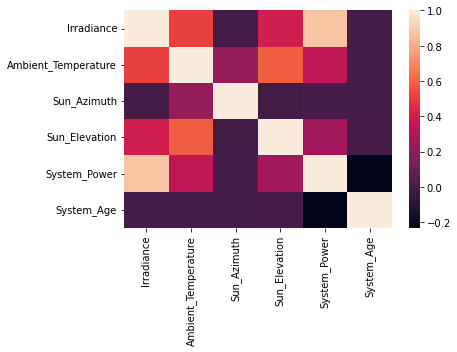

In [7]:
# Correlation matrix
corr_matrix = X_training.corr()
sn.heatmap(corr_matrix)
plt.show()

In [8]:
# Scaling of the features

scaler = StandardScaler()
scaler.fit(X_training)
X_training_scaled = scaler.transform(X_training)

# Multi Classification Model 1

In [9]:
X_train, X_val, y_train_mc, y_val_mc = train_test_split(X_training_scaled, y_mc_train1d, test_size=0.15, random_state=4720)
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=3)
pol.fit(X_train)
X_train_pol = pol.transform(X_train)
X_val_pol = pol.transform(X_val)
lr = LogisticRegression(multi_class='multinomial',max_iter=1000)
y_pred = lr.fit(X_train, y_train_mc).predict(X_val)
print("Accuracy:", accuracy_score(y_val_mc, y_pred))
lr_pol = LogisticRegression(multi_class='multinomial',max_iter=1000)
y_pred_pol = lr_pol.fit(X_train_pol, y_train_mc).predict(X_val_pol)
print("Accuracy pol:", accuracy_score(y_val_mc, y_pred_pol))

Accuracy: 0.6215686274509804
Accuracy pol: 0.7503267973856209


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
rfc = RandomForestClassifier(n_estimators=90)
y_pred = rfc.fit(X_train, y_train_mc).predict(X_val)
print("Accuracy:", accuracy_score(y_val_mc, y_pred))   #meglio linear

Accuracy: 0.7150326797385621


don't run it's heavy

In [69]:
bag = BaggingClassifier(base_estimator=svm.SVC(kernel='rbf',C=700, coef0=0.0, tol=1e-3),n_estimators=10, random_state=0)
y_pred = bag.fit(X_train, y_train_mc).predict(X_val)
print("Accuracy:", accuracy_score(y_val_mc, y_pred))

Accuracy: 0.7666666666666667


In [24]:
clf_svmgauss = svm.SVC(kernel='rbf',C=800).fit(X_train, y_train_mc)
y_prediction_svmguass = clf_svmgauss.predict(X_val)

In [25]:
Accuracy_svmG = accuracy_score(y_val_mc,y_prediction_svmguass)
print("Accuracy with linear features: " + str(Accuracy_svmG))

Accuracy with linear features: 0.7830065359477124


# Multi Classification Model 2

In [67]:
from sklearn.neural_network import MLPClassifier

FF_NN = MLPClassifier(hidden_layer_sizes=(X_train_pol.shape[1], 3), activation='relu', solver='adam', max_iter=200, shuffle=True, random_state=1, tol=0.0001, verbose=False, early_stopping=False, validation_fraction=0.1)
y_pred = FF_NN.fit(X_train_pol, y_train_mc).predict(X_val_pol)
print("Accuracy with polynomial features:", accuracy_score(y_val_mc, y_pred))

FF_NN = MLPClassifier(hidden_layer_sizes=(X_train.shape[1], 5), activation='relu', solver='adam', max_iter=200, shuffle=True, random_state=1, tol=0.0001, verbose=False, early_stopping=False, validation_fraction=0.1)
y_pred = FF_NN.fit(X_train, y_train_mc).predict(X_val)
print("Accuracy with linear features:", accuracy_score(y_val_mc, y_pred))

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy with polynomial features: 0.7888888888888889
Accuracy with linear features: 0.696078431372549


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [27]:
# define baseline model

def baseline_model(layers,nodes):
	# create model 1 hidden layer with 8 nodes
    #nodes=8
    input_node=6
    output_node=4
    model = Sequential()
    model.add(Dense(nodes[0], input_dim=input_node, activation='relu'))
    for i in range(1,layers):
        model.add(Dense(nodes[i], activation='relu'))
    model.add(Dense(output_node, activation='softmax'))    #activation='softmax' for muticlass
	# Compile mode
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [28]:
layers=4
nodes=[6,6,5,4]
model=baseline_model(layers,nodes)
#visualize_nn(model, description=True, figsize=(10,8))

In [29]:
# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_val_mc)
encoded_Y = encoder.transform(y_val_mc)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_val = np_utils.to_categorical(encoded_Y)
print(dummy_y_val)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [30]:
# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train_mc)
encoded_Y = encoder.transform(y_train_mc)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train = np_utils.to_categorical(encoded_Y)
print(dummy_y_train)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


In [31]:
history = model.fit(X_train, dummy_y_train, epochs=1600, batch_size=10)

Epoch 1/1600
867/867 [==============================] - 2s 2ms/step - loss: 1.1674 - accuracy: 0.5476
Epoch 2/1600
867/867 [==============================] - 1s 2ms/step - loss: 0.9466 - accuracy: 0.6223
Epoch 3/1600
867/867 [==============================] - 1s 2ms/step - loss: 0.8978 - accuracy: 0.6315
Epoch 4/1600
867/867 [==============================] - 1s 2ms/step - loss: 0.8802 - accuracy: 0.6389
Epoch 5/1600
867/867 [==============================] - 1s 2ms/step - loss: 0.8705 - accuracy: 0.6426
Epoch 6/1600
867/867 [==============================] - 1s 2ms/step - loss: 0.8627 - accuracy: 0.6446
Epoch 7/1600
867/867 [==============================] - 1s 2ms/step - loss: 0.8516 - accuracy: 0.6482
Epoch 8/1600
867/867 [==============================] - 1s 2ms/step - loss: 0.8400 - accuracy: 0.6493
Epoch 9/1600
867/867 [==============================] - 1s 2ms/step - loss: 0.8285 - accuracy: 0.6448
Epoch 10/1600
867/867 [==============================] - 1s 2ms/step - loss: 0.816

In [32]:
pred=model.predict(X_val)
print(pred.argmax(axis=1))
accuracy = accuracy_score(dummy_y_val.argmax(axis=1),pred.argmax(axis=1))
print('Accuracy: %.2f' % (accuracy*100))

[0 3 3 ... 0 3 0]
Accuracy: 78.63


In [33]:
# evaluate the keras model
_,accuracy = model.evaluate(X_val, dummy_y_val)   
print('Accuracy: %.2f' % (accuracy*100))

48/48 [==============================] - 1s 2ms/step - loss: 0.5120 - accuracy: 0.7863
Accuracy: 78.63


In [34]:
y_mc_predict=model.predict(X_val,batch_size=10)
matrix = confusion_matrix(dummy_y_val.argmax(axis=1), y_mc_predict.argmax(axis=1))
matrix

array([[696,  51,  21,   0],
       [ 80, 160,   2,   8],
       [ 98,  27, 116,  13],
       [  1,   9,  17, 231]], dtype=int64)